<a href="https://colab.research.google.com/github/prakash-bisht/DSA/blob/main/DSA2_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Input Format. There is a single integer 𝑁 in the first line — the number of queries. It’s followed by 𝑁
lines, each of them contains one query in the format described above.

Constraints. 1 ≤ 𝑁 ≤ 105 . All phone numbers consist of decimal digits, they don’t have leading zeros, and
each of them has no more than 7 digits. All names are non-empty strings of latin letters, and each of
them has length at most 15. It’s guaranteed that there is no person with name “not found".

Output Format. Print the result of each find query — the name corresponding to the phone number or
“not found" (without quotes) if there is no person in the phone book with such phone number. Output
one result per line in the same order as the find queries are given in the input.

Sample 1.

Input:
8
find 3839442
add 123456 me
add 0 granny
find 0
find 123456
del 0
del 0
find 0

Output:
not found
granny
me
not found
"""

In [ ]:
class Query:
    def __init__(self, query):
        self.type = query[0]
        self.number = query[1]
        if self.type == "add":
            self.name = query[2]

def ProcessQuery(query, contacts):
    if query.type == "add":
        contacts[query.number] = query.name
    elif query.type == "del":
        if contacts.__contains__(query.number):
            del contacts[query.number]
    else:
        response = 'not found'
        if contacts.__contains__(query.number):
            response = contacts[query.number]
        return response

n_queries = int(input())
contacts = {}
for _ in range(n_queries):
    query = Query(input().split())
    result = ProcessQuery(query, contacts)
    if result:
        print(result)

2
add 2 me
find 2
me


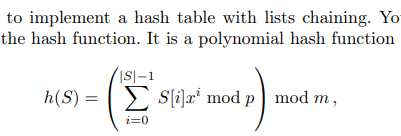

In [ ]:
from IPython.display import Image
Image(filename='Screenshot from 2022-09-11 22-18-16.png')

In [ ]:
"""Input Format. There is a single integer 𝑚 in the first line — the number of buckets you should have. The
next line contains the number of queries 𝑁. It’s followed by 𝑁 lines, each of them contains one query
in the format described above.

Constraints. 1 ≤ 𝑁 ≤ 105;𝑁/5 ≤ 𝑚 ≤ 𝑁. All the strings consist of latin letters. Each of them is non-empty
and has length at most 15.

Output Format. Print the result of each of the find and check queries, one result per line, in the same
order as these queries are given in the input.


Sample 1.

Input:
5
12
add world
add HellO
check 4
find World
find world
del world
check 4
del HellO
add luck
add GooD
check 2
del good

Output:
HellO world
no
yes
HellO
GooD luck"""

"""The ASCII code of ’w’ is 119, for ’o’ it is 111, for ’r’ it is 114, for ’l’ it is 108, and for ’d’
it is 100. Thus, 𝑕(“world") = (119 + 111 × 263 + 114 × 263**2 + 108 × 263**3 + 100 × 263**4 mod
1 000 000 007) mod 5 = 4. It turns out that the hash value of 𝐻𝑒𝑙𝑙𝑂 is also 4. Recall that we always insert in the beginning of the chain, 
so after adding “world" and then “HellO" in the same
chain index 4, first goes “HellO" and then goes “world". Of course, “World" is not found, and
“world" is found, because the strings are case-sensitive, and the codes of ’W’ and ’w’ are different. After deleting “world",
 only “HellO" is found in the chain 4. Similarly to “world" and “HellO",
after adding “luck" and “GooD" to the same chain 2, first goes “GooD" and then “luck"."""

In [ ]:
from collections import deque 

class Query:
  def __init__(self,query):
    self.type = query[0]
    if self.type == 'check':
      self.index = int(query[1])
    else:
      self.word = query[1]
  
class Queryprocessor:
    _multiplier = 263
    _prime = 1000000007

    def __init__(self,bucket_count):
      self.bucket_count = bucket_count 
      self.hash_table = list(deque() for _ in range(self.bucket_count))

    def hashfunction(self,word):
      hash_value = 0
      for char in reversed(word):
        hash_value = (hash_value * self._multiplier + ord(char)) % self._prime  
      return hash_value % self.bucket_count

    def processquery(self,query):
      if query.type == 'check':
        if self.hash_table[query.index]:
          print(' '.join(self.hash_table[query.index]))
        else:
          print()
      else:
        hash_value = self.hashfunction(query.word)
        if query.type == 'add':
          if query.word not in self.hash_table[hash_value]:
            self.hash_table[hash_value].appendleft(query.word)

        elif query.type == 'del':
          if query.word in self.hash_table[hash_value]:
            self.hash_table[hash_value].remove(query.word)

        elif query.type == 'find':
          if query.word in self.hash_table[hash_value]:
            print('yes')
          else:
            print('no')

if __name__ == "__main__":
  n_buckets = int(input())
  hash_table = Queryprocessor(n_buckets)
  n_queries = int(input())
  for _ in range(n_queries):
    command = Query(input().split())
    hash_table.processquery(command)


5
12
add world
add Hell0
check 4
Hell0 world
find World
no
find world
yes
del world 
check 4
Hell0
add luck
add good
check 2
luck
del good
check 2
luck


In [ ]:
#In this problem, your goal is to implement the Rabin–Karp’s algorithm.

"""Input Format. There are two strings in the input: the pattern 𝑃 and the text 𝑇.

Output Format. Print all the positions of the occurrences of 𝑃 in 𝑇 in the ascending order. Use 0-based
indexing of positions in the the text 𝑇.

Sample 1.

Input:
aba
abacaba

Output:
0 4

Explanation:
The pattern 𝑎𝑏𝑎 can be found in positions 0 (abacaba) and 4 (abacaba) of the text 𝑎𝑏𝑎𝑐𝑎𝑏𝑎."""

In [ ]:
def polyhash(string,prime,multiplier):
  hash_value = 0
  for i in range(len(string) -1,-1,-1):
    hash_value = (hash_value * multiplier + ord(string[i])) % prime 
  return hash_value 

def precomputehash(text,pattern,prime,multiplier):
  p = len(pattern)
  t = len(text)
  s = text[t-p:]
  h = list([] for _ in range(t-p+1))
  h[t-p] = polyhash(s,prime,multiplier)
  y = 1
  for i in range(1,p+1):
    y = (y * multiplier) % prime
  for i in range(t-p-1,-1,-1):
    h[i] = (multiplier * h[i+1] + ord(text[i]) - y * ord(text[i + p])) % prime
  return h 

def rabin_karp(text,pattern):
  t = len(text)
  p = len(pattern)
  prime = 1000000007
  multiplier = 236
  result = []
  pattern_hash = polyhash(pattern,prime,multiplier)
  hash_substring = precomputehash(text,pattern,prime,multiplier)
  for i in range(t-p+1):
    if pattern_hash == hash_substring[i]:
      result.append(i)
  return result 


if __name__ == '__main__':
  pattern = input()
  text = input()
  position = rabin_karp(text,pattern)
  for pos in position:
    print(pos,end=' ')

aba
abacaba
0 4 

In [ ]:
"""Input Format. The first line contains a string 𝑠 consisting of small Latin letters. The second line contains
the number of queries 𝑞. Each of the next 𝑞 lines specifies a query by three integers 𝑎, 𝑏, and 𝑙.

Output Format. For each query, output “Yes” if 𝑠𝑎𝑠𝑎+1. . .𝑠𝑎+𝑙−1 = 𝑠𝑏𝑠𝑏+1. . .𝑠𝑏+𝑙−1 are equal, and “No”
otherwise.

Sample 1.

Input:
trololo
4
0 0 7
2 4 3
3 5 1
1 3 2

Output:
Yes
Yes
Yes
No

0 0 7 → trololo = trololo
2 4 3 → trololo = trololo
3 5 1 → trololo = trololo
1 3 2 → trololo != trololo"""

#However, if the hash values are the same, it is still possible that the substrings are different — this is called a collision. 
#To further reduce the probability of a collision, one may take two different modulus

In [ ]:
def hashtable(string,prime,x):
  hash_table = list([] for _ in range(len(string)+1))
  hash_table[0] = 0
  for i in range(1,len(string)+1):
    hash_table[i] = (hash_table[i-1] * x + ord(string[i-1])) % prime
  return hash_table 

def hashvalue(hash_table,prime,x,start,length):
  y = pow(x,length,prime)
  hash_value = (hash_table[start+length] - y * hash_table[start]) % prime
  return hash_value 

def are_equal(table1,table2,prime1,prime2,x,a,b,l):
  a_hash1 = hashvalue(table1,prime1,x,a,l)
  b_hash1 = hashvalue(table1,prime1,x,b,l)
  a_hash2 = hashvalue(table2,prime2,x,a,l)
  b_hash2 = hashvalue(table2,prime2,x,b,l)
  if a_hash1 == b_hash1 and a_hash2 == b_hash2:
    return 'yes'
  else:
    return 'no'

if __name__ == "__main__":
  string = input()
  n_queries = int(input())
  m = 1000000007
  m2 = 1000000009
  x = 263
  hash_table1 = hashtable(string,m,x)
  hash_table2 = hashtable(string,m2,x)
  for i in range(n_queries):
    a,b,l = map(int,input().split())
    print(are_equal(hash_table1,hash_table2,m,m2,x,a,b,l))

trololo
4
0 0 7
yes
2 4 3
yes
3 5 1
yes
1 3 2
no


In [ ]:
"""Input Format. Every line of the input contains two strings 𝑠 and 𝑡 consisting of lower case Latin letters.

Output Format. For each pair of strings 𝑠 and 𝑡𝑖
, find its longest common substring and specify it by
outputting three integers: its starting position in 𝑠, its starting position in 𝑡 (both 0-based), and its
length. More formally, output integers 0 ≤ 𝑖 < |𝑠|, 0 ≤ 𝑗 < |𝑡|, and 𝑙 ≥ 0 such that 𝑠𝑖𝑠𝑖+1 · · · 𝑠𝑖+𝑙−1 =
𝑡𝑗 𝑡𝑗+1 · · ·𝑡𝑗+𝑙−1 and 𝑙 is maximal. (As usual, if there are many such triples with maximal 𝑙, output any
of them.)

Sample 1.

Input:

cool toolbox
aaa bb
aabaa babbaab

Output:
1 1 3
0 1 0
0 4 3

Explanation:
The longest common substring of the first pair of strings is ool, it starts at the first position in toolbox
and at the first position in cool. The strings from the second line do not share any non-empty common
substrings (in this case, 𝑙 = 0 and one may output any indices 𝑖 and 𝑗). Finally, the last two strings
share a substring aab that has length 3 and starts at position 0 in the first string and at position 4 in
the second one. Note that for this pair of string one may output 2 3 3 as well."""

In [8]:
def polyhash(s,prime,multiplier):
  hash_value = 0 
  for i in range(len(s)-1,-1,-1):
    hash_value = (hash_value * multiplier + ord(s[i])) % prime
  return hash_value 

def hashtable(s,p_len,prime,multiplier):
  h = list([] for _ in range(len(s)-p_len + 1))
  substring = s[len(s)-p_len:]
  h[len(s)-p_len] = polyhash(substring,prime,multiplier)
  y = pow(multiplier,p_len,prime)
  for i in range(len(s)-p_len-1,-1,-1):
    h[i] = (multiplier * h[i+1] + ord(s[i]) - y * ord(s[i+p_len])) % prime  
  return h 

def hashdict(s,p_len,prime,multiplier):
  d = {}
  substring = s[len(s)-p_len:]
  last = polyhash(substring,prime,multiplier)
  d[last] = len(s) - p_len
  y = pow(multiplier,p_len,prime)
  for i in range(len(s)-p_len-1,-1,-1):
    current = (multiplier * last + ord(s[i]) - y * ord(s[i+p_len])) % prime  
    d[current] = i
    last = current 
  return d

def searchstring(hash_table,hash_dict): 
  check = False 
  matches = {}
  for i in range(len(hash_table)):
    b_start = hash_dict.get(hash_table[i],-1)
    if b_start != -1:
      check = True 
      matches[i] = b_start 
  return check,matches 

def maxlength(string_a,string_b,low,high,max_length,astart,bstart):
  mid = (low + high) // 2 
  if low > high:
    return astart,bstart,max_length
  prime1 = 1000000007
  prime2 = 1000004249
  x = 263
  ahash1 = hashtable(string_a,mid,prime1,x)
  ahash2 = hashtable(string_a,mid,prime2,x)
  bhash1 = hashdict(string_b,mid,prime1,x)
  bhash2 = hashdict(string_b,mid,prime2,x)
  check1,matches1 = searchstring(ahash1,bhash1)
  check2,matches2 = searchstring(ahash2,bhash2)
  if check1 and check2:
    for a,b in matches1.items():
      temp = matches2.get(a,-1)
      if temp != -1:
        max_length = mid 
        astart,bstart = a,b
        del ahash1,ahash2,bhash1,bhash2,matches1,matches2
        return maxlength(string_a,string_b,mid+1,high,max_length,astart,bstart)
  return maxlength(string_a,string_b,low,mid-1,max_length,astart,bstart)

while True:
  line = input()
  if line == '':
    break 
  else:
    s,t = line.split()
    k = min(len(s),len(t))
    if len(s) <= len(t):
      short_string,long_string = s,t
    else:
      short_string,long_string = t,s
    l,i,j = maxlength(long_string,short_string,0,k,0,0,0)
    if len(s) <= len(t):
      print(i,l,j)
    else:
      print(l,i,j)
    

cool toolbox
1 1 3
aaa bb
0 0 0
aabaa babbaab
2 3 3

